In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('spam.csv', encoding='latin1')
df= df.drop(df.columns[[2,3,4]],axis=1)

In [111]:
df.rename(columns=
         {"v1":"classification",
         "v2":"SMS"},
          inplace=True)

In [112]:
df

,classification,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [113]:
graph= df.classification.value_counts()
graph

classification
ham     4825
spam     747
Name: count, dtype: int64

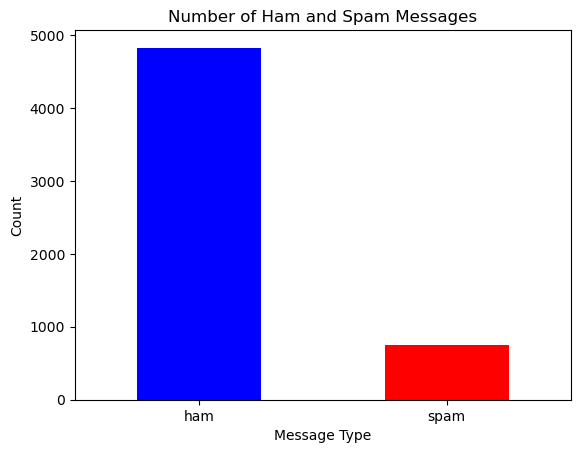

In [114]:
graph.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Number of Ham and Spam Messages')
plt.xticks(rotation=0)
plt.show()

In [115]:
df1 = df[df["classification"] == "ham"]
df0 = df[df["classification"] == "spam"]
df1.shape

(4825, 2)

In [116]:
df0 = df0.sample(df1.shape[0], replace=True)
df1 = pd.concat([df1, df0], axis=0)
pf= df1.classification.value_counts()

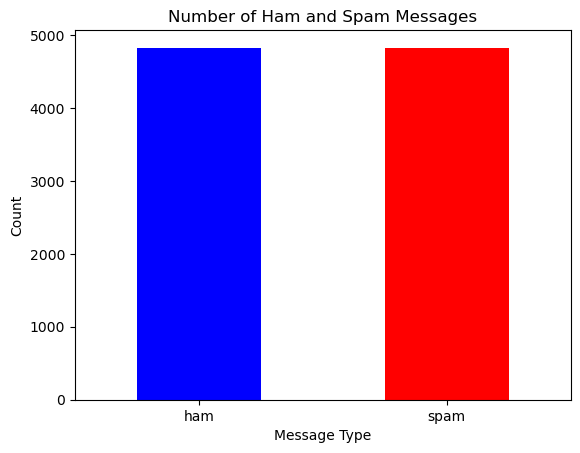

In [117]:
pf.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Number of Ham and Spam Messages')
plt.xticks(rotation=0)
plt.show()

In [118]:
df1

,classification,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
2821,spam,ROMCAPspam Everyone around should be respondin...
4014,spam,You will be receiving this week's Triple Echo ...
2692,spam,Urgent Urgent! We have 800 FREE flights to Eur...
4211,spam,Missed call alert. These numbers called but le...


In [29]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nehit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import string
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = text.split()
    text = [word for word in text if word not in stop_words]
    text = ' '.join(text)
    return text

In [57]:
df1['SMS'] = df1['SMS'].apply(preprocess_text)

In [58]:
df1['SMS']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
6          even brother like speak treat like aids patent
                              ...                        
4448    urgent ur awarded complimentary trip eurodisin...
517     credits topped httpwwwbubbletextcom renewal pi...
823     25p 4 alfie moons children need song ur mob te...
716     449071512431 urgent 2nd attempt contact uu å£1...
1072    dear uve invited xchat final attempt contact u...
Name: SMS, Length: 9650, dtype: object

In [54]:
df1['classification'] = df1["classification"].map({
    "ham":1,
    "spam":0
})
df1['classification'].value_counts()

classification
1    4825
0    4825
Name: count, dtype: int64

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1['SMS'], df1['classification'], test_size=0.2, random_state=42)

# Vectorizing text


tf = TfidfVectorizer()
x_train = tf.fit_transform(X_train)
x_test = tf.transform(X_test)

In [65]:
x_train.shape, x_test.shape, y_train.value_counts()

((7720, 8491),
 (1930, 8491),
 classification
 0    3880
 1    3840
 Name: count, dtype: int64)

In [64]:
y_train[:5]

3942    1
158     0
1651    1
2108    0
3826    0
Name: classification, dtype: int64

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
ran = RandomForestClassifier(n_estimators=100)
dec = DecisionTreeClassifier()

models = {
    "RandomForest" : ran,
    "DesisionTree": dec,
    "LogisticRegression" : LogisticRegression(max_iter=100),
    "Support Vector Machine": SVC(gamma="auto", kernel="rbf"),
    "Naive Bayes": MultinomialNB()
}

In [74]:
scores = []
for name, var in models.items():
    var.fit(x_train, y_train)
    y_predict = var.predict(x_test)
    scores.append({
        "Model_name": name,
        "Test Accuracy": var.score(x_test, y_test), 
        "Train Acurracy":var.score(x_train,y_train),
        "precision" : precision_score(y_test, y_predict,average='weighted',zero_division=0),
        "recall" : recall_score(y_test, y_predict,average='weighted',zero_division=0),
        "f1_score" : f1_score(y_test, y_predict,average='weighted',zero_division=0)
        
    })
df1 = pd.DataFrame(scores)
df1

,Model_name,Test Accuracy,Train Acurracy,precision,recall,f1_score
0,RandomForest,0.999482,1.000000,0.999482,0.999482,0.999482
1,DesisionTree,0.979793,1.000000,0.980594,0.979793,0.979793
2,LogisticRegression,0.988601,0.994041,0.988633,0.988601,0.988600
3,Support Vector Machine,0.489637,0.502591,0.239745,0.489637,0.321883
4,Naive Bayes,0.975130,0.987824,0.975151,0.975130,0.975131


In [68]:
ran.fit(x_train, y_train)
y_pred = ran.predict(x_test)
y_test = np.array(y_test)
y_predict[:5], y_test[:5]

(array([1, 1, 1, 1, 0], dtype=int64), array([1, 1, 1, 1, 0], dtype=int64))

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       945
           1       0.98      0.97      0.98       985

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



In [70]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[945,   0],
       [  1, 984]], dtype=int64)

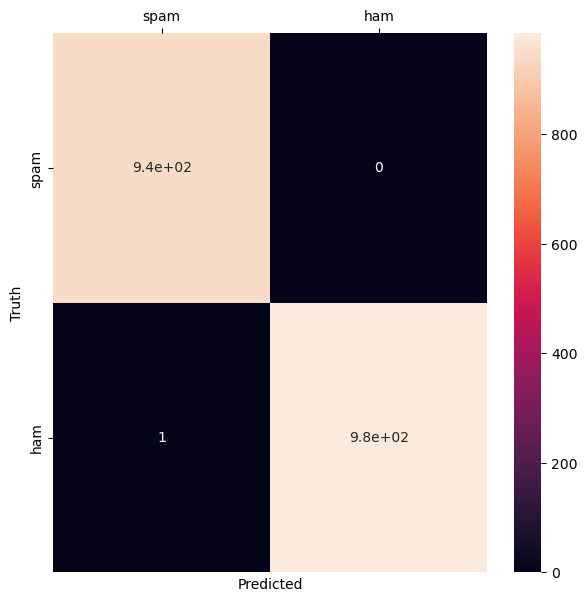

In [71]:
#Visualising the condfusion matrix in heat map
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,7))
ax= sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
ax.xaxis.set_ticklabels(["spam", "ham"])
ax.yaxis.set_ticklabels(["spam", "ham"])
ax.xaxis.tick_top()